# LATIHAN 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [ ]:
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

Text(0.5, 1.0, 'Blobs')

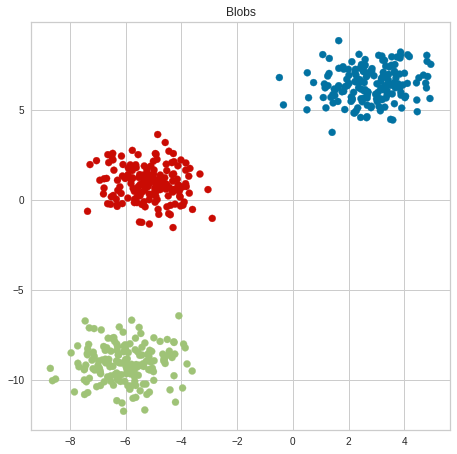

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r','g','b'])
ax.scatter(blobs[:,0], blobs[:,1], color=rgb[classes])
ax.set_title("Blobs")

In [ ]:
# 3 titik tengan dari 3 kluster
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans (algorithm = 'auto', copy_x = True, init = 'k-means++', max_iter=300, n_clusters=3, n_init=10,random_state = None, tol=0.0001, verbose=0)
kmean.cluster_centers_

array([[ 2.78102765,  6.41053012],
       [-6.02153079, -9.07500771],
       [-5.13636787,  0.91125403]])

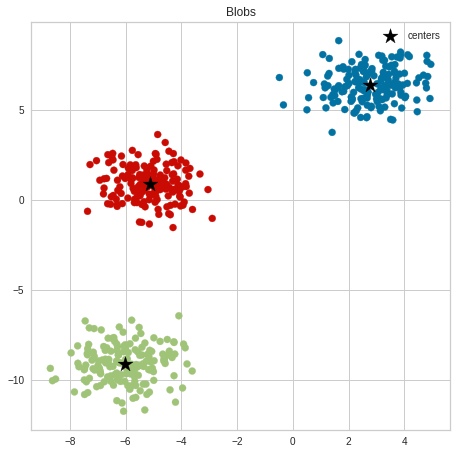

In [ ]:
#visualisasi kan lagi
f, ax= plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:,0], blobs[:,1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:, 0],kmean.cluster_centers_[:,1], marker='*', s =250, color='black',label="centers")
ax.set_title("Blobs")
ax.legend(loc="best")

In [ ]:
#periksa label kmean dan class
kmean.labels_[:5]


array([1, 0, 1, 0, 1], dtype=int32)

In [ ]:
classes[:5]

array([1, 2, 1, 2, 1])

In [ ]:
kmean.transform(blobs)[:5]

array([[18.46391711,  1.35564131, 11.11672239],
       [ 0.93484476, 17.91288317,  9.34674963],
       [17.60209061,  1.69012058,  9.17687554],
       [ 0.46065137, 17.87115702,  9.49968947],
       [19.78462838,  2.66392381, 12.55535378]])

Text(0.5, 1.0, 'Blobs')

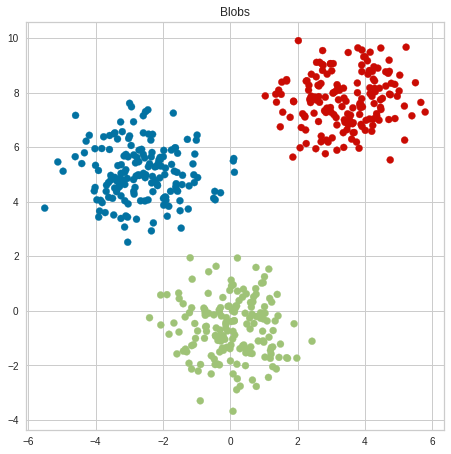

In [ ]:
#Optimisasi dengan mencari angka K atau berapa jumlah kluster yang menghasilkan akurasi
#yang baik. Pada percobaan kali ini akan digunakan silhoutte dan elbow.

blobs, classes= make_blobs(500, centers=3)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans(algorithm = 'auto', copy_x = True, init = 'k-means++', max_iter=300, n_clusters=3, n_init=10,random_state = None, tol=0.0001, verbose=0)

f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r','g','b'])
ax.scatter(blobs[:,0], blobs[:,1], color=rgb[classes])
ax.set_title("Blobs")

In [ ]:
from sklearn.metrics.cluster import silhouette_samples
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[2.        , 0.71782376],
       [1.        , 0.79171677],
       [2.        , 0.69613933],
       [0.        , 0.80608874],
       [1.        , 0.79428795]])

In [ ]:
silhouette_samples.mean()

0.7110468866823675

In [ ]:
metrics.silhouette_score(blobs, kmean.labels_)

0.7110468866823675

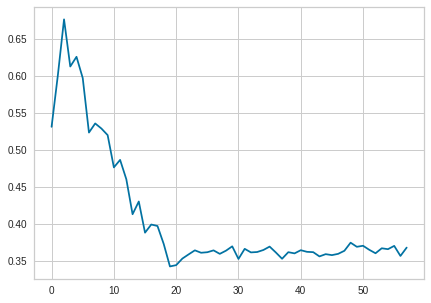

In [ ]:
#visualisasi
blobs, classes = make_blobs(500, centers=10)
silhouette_avgs=[]
for k in range(2, 60):
  kmean = KMeans(n_clusters=k).fit(blobs)
  silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))

f, ax = plt.subplots(figsize=(7,5))
ax.plot(silhouette_avgs)

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range (2, 21):
  km = KMeans(n_clusters=n_clusters)
  preds = km.fit_predict(blobs)
  centers = km.cluster_centers_

score = silhouette_score(blobs, preds, metric ='euclidean')
print ("untuk n_clusters ={}, silhouette score is{}". format(n_clusters, score))

untuk n_clusters =20, silhouette score is0.3458214069472969


In [ ]:
# menentukan angka terbaik pada klatering metode elbow

wcss = []
range_values= range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(blobs)
  wcss.append(kmeans.inertia_)

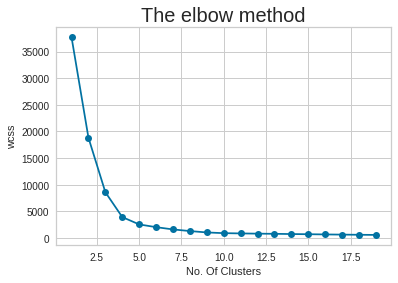

In [ ]:
plt.plot(range(1,20), wcss, marker = 'o')
plt.title("The elbow method", fontsize = 20)
plt.xlabel ("No. Of Clusters")
plt.ylabel('wcss')
plt.show()

angka oprtimal yang di dapat menggunakan metode elbow adalah 35000


# Latihan 2


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("/credit_card.csv")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
shape = df.shape
shape


(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

a) dimensi data tersebut adalah 8950,18 dengan jumlah instance 18 dan variabel 8950



b) tipe data float, integer dan object

c)tidak terdapat data yang null

In [ ]:
# EKSPLORASI DATA

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# correlation in numerical feature
df.corr().style.background_gradient(cmap = 'Blues')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [ ]:
cust_id = df.iloc[:,0]. value_counts()
cust_id

C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  2.393386042571806
Kurtosis:  7.6747512999062515


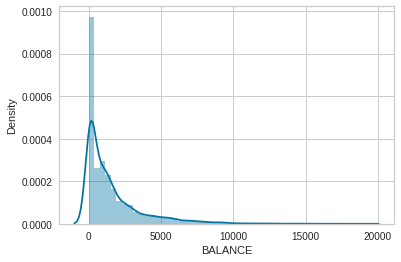

In [ ]:
sb.distplot(df['BALANCE'])
print("Skewness: ", df['BALANCE'].skew())
print("Kurtosis: ", df['BALANCE'].kurt())

In [ ]:
# Mencari angka optimum clustering. Gunakan dua metode elbow dan silhoutte. Output berupa grafik dan jumlah kemungkinan n clustering pada silhoutte.

df = df.dropna()

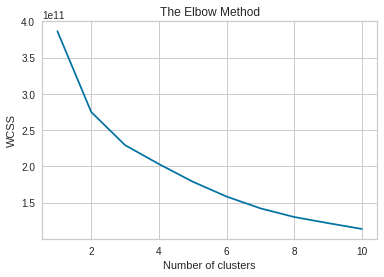

In [ ]:
# Elbow Method
X = df.select_dtypes(include= 'number')

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
# Print the score

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.466


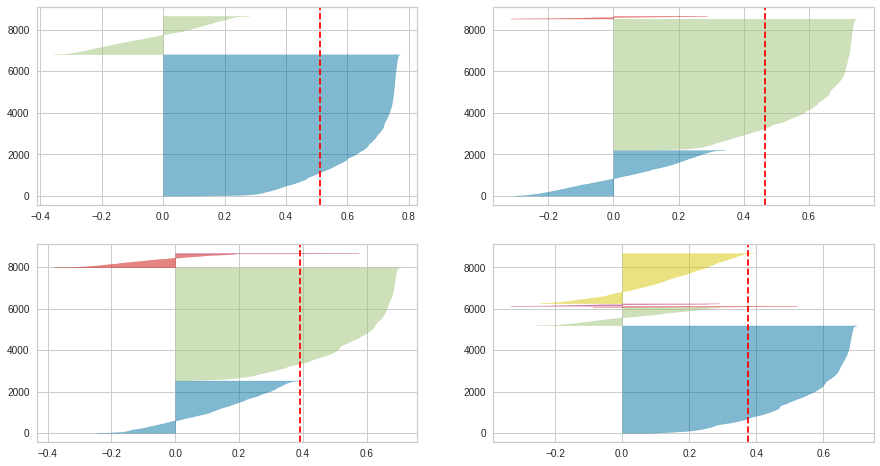

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
#4
import pandas as pd
import numpy as np
from sklearn import preprocessing

csv_data = pd.read_csv("/content/credit_card.csv")
array = csv_data.values

X = array[:,2:5]
Y = array[:,0:1]

In [ ]:
print(csv_data) #untuk mengetahui bentuk tabel
print(X) #untuk mengetahui nilai array X
print(Y) #untuk mengetahui nilai array Y

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [ ]:
dataset=pd.DataFrame({'BALANCE':array[:,0],'PURCHASES':array[:,1],'CASH_ADVANCE':array[:,2],'PURCHASES_FREQUENCY':array[:,3],'TENURE':array[:,4]})
print("dataset sebelum dinormalisasi :")
print(dataset.head(5))

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #inisialisasi normalisasi MinMax
data = min_max_scaler.fit_transform(X) #transformasi MinMax untuk fitur
dataset = pd.DataFrame({'BALANCE':data[:,0],'PURCHASES':data[:,1],'CASH_ADVANCE':data[:,2],'PURCHASES_FREQUENCY':array[:,0],'TENURE':array[:,1]})

print("dataset setelah dinormalisasi :")
print(dataset.head(5))


dataset sebelum dinormalisasi :
  BALANCE    PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  TENURE
0  C10001    40.900749     0.818182                95.4     0.0
1  C10002  3202.467416     0.909091                 0.0     0.0
2  C10003  2495.148862          1.0              773.17  773.17
3  C10004  1666.670542     0.636364              1499.0  1499.0
4  C10005   817.714335          1.0                16.0    16.0
dataset setelah dinormalisasi :
    BALANCE  PURCHASES  CASH_ADVANCE PURCHASES_FREQUENCY       TENURE
0  0.818182   0.001945      0.000000              C10001    40.900749
1  0.909091   0.000000      0.000000              C10002  3202.467416
2  1.000000   0.015766      0.018968              C10003  2495.148862
3  0.636364   0.030567      0.036775              C10004  1666.670542
4  1.000000   0.000326      0.000393              C10005   817.714335


In [ ]:
#5
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [ ]:
#6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
km_sample = KMeans(n_clusters=4)
km_sample.fit(X)

KMeans(n_clusters=4)

In [ ]:
labels_sample = km_sample.labels_

In [ ]:
df['label'] = labels_sample

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


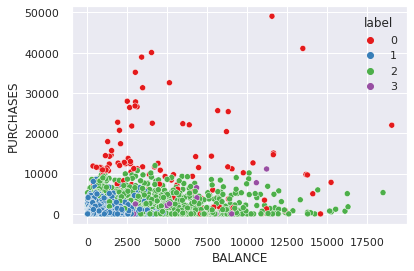

In [ ]:
sns.set_palette('Set2')
sns.scatterplot(df['BALANCE'],df['PURCHASES'],hue=df['label'],palette='Set1')

# Kesimpulan
Kmeans bisa mengolah data yang banyak, algortima ini hanya mengolah data kuantitatif. 

pada label berwarna merah terlihat saldo dan pembelian rendah

pada label berwarna biru terlihat Saldo rendah-sedang dan pembelian tinggi

pada label berwarna hijau terlihat saldo dan pembelian sedang 

pada label berwarna ungu terlihat Saldo sedang-tinggi dan pembelian rendah